### CTC Prediction - Regression Task

#### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Importing CSV files

In [2]:
df = pd.read_csv('ML case Study.csv')
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [3]:
colleges = pd.read_csv('Colleges.csv')
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [4]:
cities = pd.read_csv('cities.csv')
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [5]:
# Creating a dictionary for college tiers
college_tier_map = {}
for i, tier in enumerate(['Tier 3', 'Tier 2', 'Tier 1'], start=1):
    for college in colleges[tier].dropna().values:
        college_tier_map[college.strip()] = i

In [6]:
# Creating a dictionary for city types
metro_cities = cities['Metrio City'].dropna().values
non_metro_cities = cities['non-metro cities'].dropna().values

In [7]:
city_map = {city: 1 for city in metro_cities}
city_map.update({city: 0 for city in non_metro_cities})

In [8]:
# Mapping the colleges in df to their respective tiers
df['College_tier'] = df['College'].map(college_tier_map)

In [9]:
# Removing College column from dataframe
df.drop(('College'), axis=1, inplace=True)

In [10]:
# Mapping the cities in df to their respective types
df['City_type'] = df['City'].map(city_map)

In [11]:
# Removing City column from dataframe
df.drop(('City'), axis=1, inplace=True)

#### Checking null values

In [12]:
df.isnull().sum()

Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
College_tier           0
City_type              0
dtype: int64

#### Summary of DataFrame

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Role                 1589 non-null   object 
 1   Previous CTC         1589 non-null   int64  
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   College_tier         1589 non-null   int64  
 7   City_type            1589 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 99.4+ KB


#### One Hot Encoding

In [14]:
df['Role_Manager'] = pd.get_dummies(df['Role'],drop_first=True).astype(int)

In [15]:
# Removing Role column from dataframe
df.drop(('Role'), axis=1, inplace=True)

#### Correlation Heatmap

In [16]:
df.corr()['CTC'].abs().sort_values(ascending=False)

CTC                    1.000000
Role_Manager           0.621311
EXP (Month)            0.301115
Previous CTC           0.258000
College_tier           0.029592
City_type              0.020365
Previous job change    0.011370
Graduation Marks       0.005450
Name: CTC, dtype: float64

<Axes: >

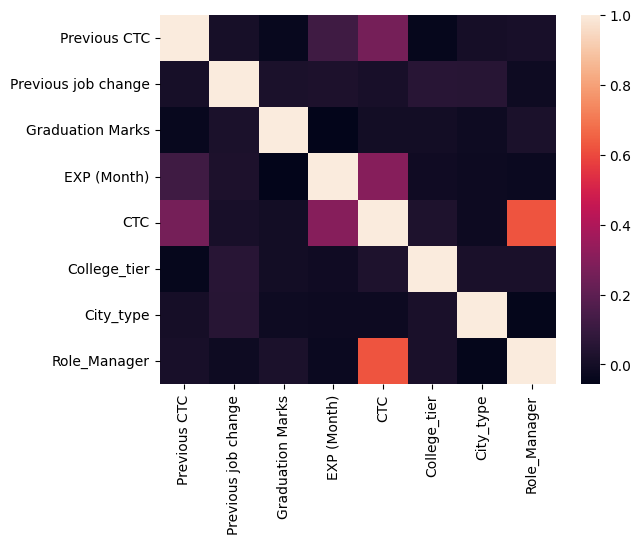

In [17]:
sns.heatmap(df.corr())

CTC is most correlated with Role_Manager, EXP (Month), and Previous CTC.

#### Descriptive Analysis

In [18]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_tier,City_type,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,2.024544,0.514160,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.838330,0.499957,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,1.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,2.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,3.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,3.000000,1.000000,1.000000


c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Previous CTC', ylabel='Count'>

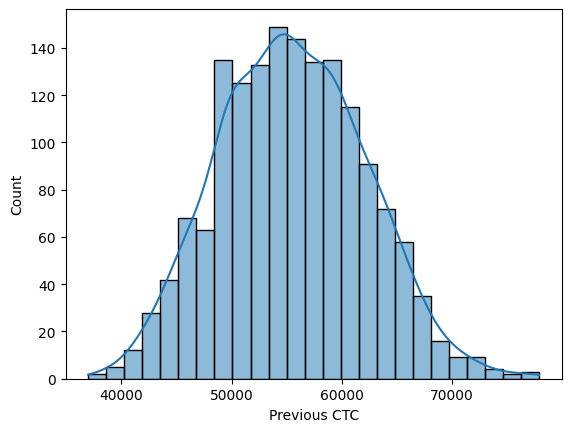

In [19]:
sns.histplot(df['Previous CTC'], kde= True)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Previous job change', ylabel='Count'>

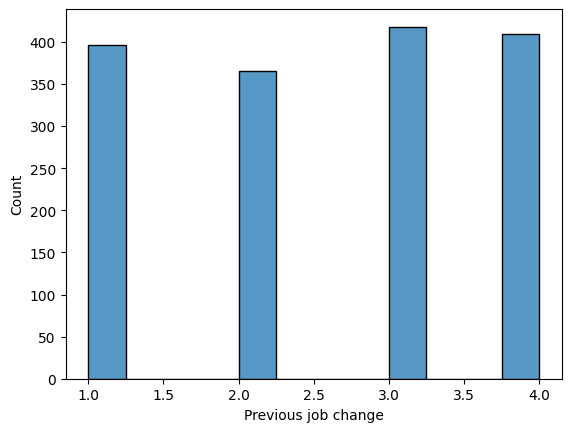

In [20]:
sns.histplot(df['Previous job change'])

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Graduation Marks', ylabel='Count'>

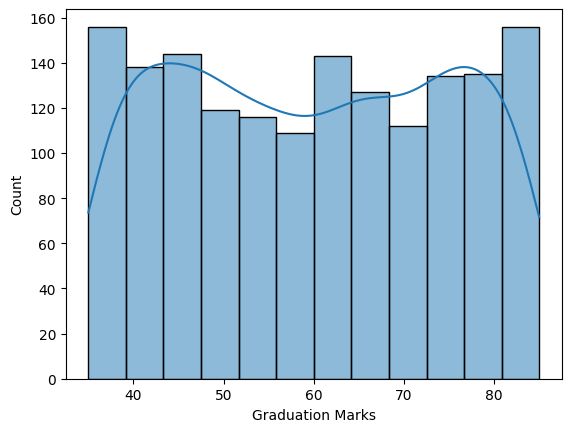

In [21]:
sns.histplot(df['Graduation Marks'], kde=True)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EXP (Month)', ylabel='Count'>

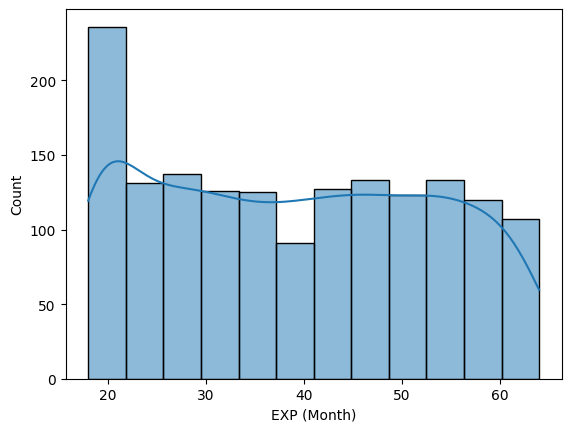

In [22]:
sns.histplot(df['EXP (Month)'], kde=True)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CTC', ylabel='Count'>

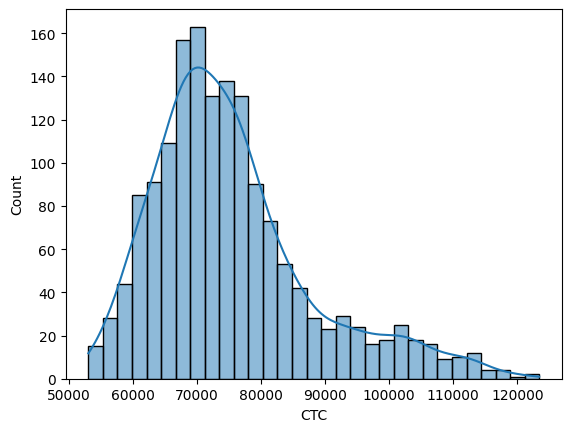

In [23]:
sns.histplot(df['CTC'], kde=True)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='College_tier', ylabel='Count'>

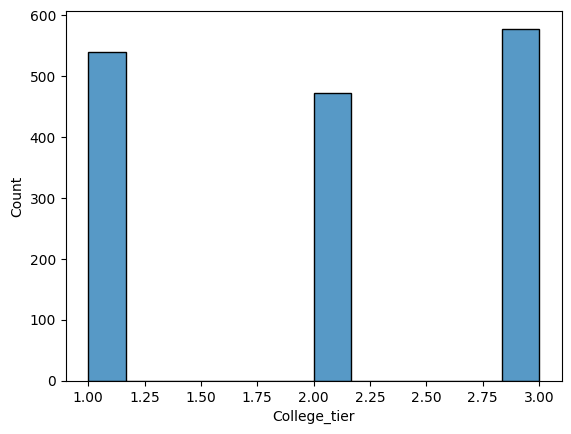

In [24]:
sns.histplot(df['College_tier'])

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='City_type', ylabel='Count'>

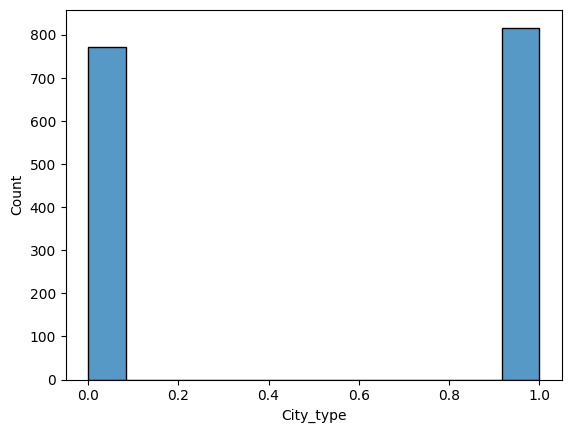

In [25]:
sns.histplot(df['City_type'])

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Role_Manager', ylabel='Count'>

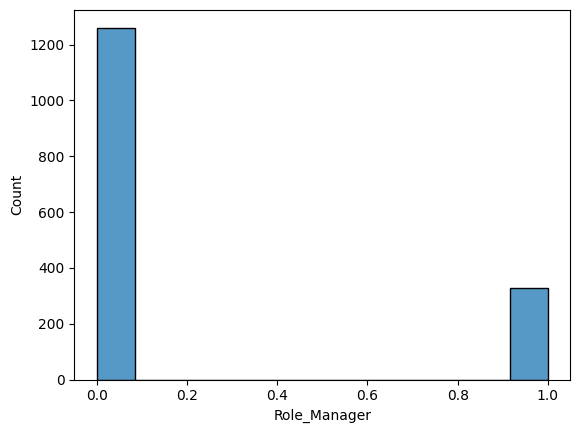

In [26]:
sns.histplot(df['Role_Manager'])

#### Independent Variable

In [27]:
X = df.drop(('CTC'), axis= 1)

#### Dependent Variable

In [28]:
y = df['CTC']

#### Training data and Testing data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_scaled = scaler.fit_transform(X)

#### Algorithms with hyperparameters

In [32]:
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params':{}
    },
    'lasso': {
        'model': Lasso(),
        'params':{'alpha': [1, 2, 5],
                  'selection': ['cyclic', 'random']
                  }
    },
    'ridge': {
        'model': Ridge(),
        'params':{'alpha': [1, 2, 5]}
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params':{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                  'splitter': ['best', 'random']
                  }
    },
    'svr': {
        'model': SVR(),
        'params':{}
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params':{'n_estimators': [50, 100, 150, 200, 500],
                  'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params':{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                  'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
                  'n_estimators': [100, 150, 250, 500],
                  'criterion': ['friedman_mse', 'squared_error']
        }
    },
    'bagging': {
        'model': BaggingRegressor(),
        'params':{'n_estimators': [10, 15, 20, 50]
                  }
    }
}

#### Model Training

In [33]:
scores = []
for algo_name, mp in algos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    reg.fit(X_scaled, y)
    scores.append(
        {
            'model': algo_name,
            'best_score': reg.best_score_,
            'best_params': reg.best_params_
        }
    )

#### Training results

In [34]:
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,linear_regression,0.531952,{}
1,lasso,0.531996,"{'alpha': 5, 'selection': 'random'}"
2,ridge,0.531964,{'alpha': 5}
3,decision_tree,0.393182,"{'criterion': 'squared_error', 'splitter': 'be..."
4,svr,-0.031627,{}
5,random_forest,0.653087,"{'criterion': 'absolute_error', 'n_estimators'..."
6,gradient_boosting,0.624761,"{'criterion': 'friedman_mse', 'learning_rate':..."
7,bagging,0.649434,{'n_estimators': 50}


#### Individual Model Training

In [35]:
model = RandomForestRegressor(criterion='absolute_error', n_estimators=500)

In [36]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=500)

#### Training results

In [37]:
y_pred = model.predict(X_test_scaled)

In [38]:
mean_squared_error(y_test, y_pred)

66913582.02551557

In [39]:
r2_score(y_test, y_pred)

0.648276732802985

#### 1. Your views about the problem statement?
* Problem Overview: The goal is to predict the salary(`CTC`) of newly hired employees at TechWorks Consulting using various features such as college, city, role, previous CTC, number of previous job change, graduation marks, and experience in months.

* Data Preparation: The data must be cleaned, preprocessed, and categorical variables converted into numerical variables. 

* Model Selection: Different regression models will be tested to find the best one for salary prediction.

#### 2. What will be your approach to solving this task?

1. Data Preprocessing:
* Convert categorical data into numerical data.
* Handle missing values and outliers.
* Feature scaling to ensure that features contribute equally to the model.

2. Exploratory Data Analysis (EDA):
* Identify correlations between features and the target variable (`CTC`).
* Analyze the distribution of features.

3. Model Selection:
* Test various regression models such as Linear Regression, Decision Tree, Random Forest, and Gradient Boosting.
* Evaluate models using performance metrics like Mean Squared Error (MSE), R-squared, etc.

4. Model Tuning:
* Hyperparameter tuning of the best-performing model using GridSearchCV.

5. Final Model Evaluation:
* Assess the final model on a test dataset.

#### 3. What ML model options did you have available to perform this task?

For regression problem, we have following ML models:
* Linear Regression
* Decision Tree Regressor
* Support Vector Regression
* Random Forest Regressor
* Gradient Boosting Regressor
* Bagging Regressor

#### 4. Which model’s performance is best and what could be the possible reason for that?

Random Forest Regressor is performing the best in this case.
The possible reasons are as follows:
* Ability to handle non-linear relationsships
* Reduce overfitting through bagging
* Effectively manage interactions between features
* Robust of Outliers

#### 5. What steps can you take to improve this selected model’s performance even further?
* Feature Engineering: Create new features based on domain knowledge (e.g., interaction terms).
* Hyperparameter Tuning: Further optimize the model's hyperparameters to improve performance.
* Data Augmentation: Gather more training data to give the model more examples to learn from. This can help the model generalize better to unseen data.
* Bias-Variance Tradeoff: Monitor the bias-variance tradeoff by analyzing model errors.